
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


In [17]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr


import os


df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [18]:
print(df.head(10))

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   
5         6       58      882           138            1    credit_card   
6         7       87      915           149            1           cash   
7         8       22      761           292            2           cash   
8         9       64      914           266            2          debit   
9        10       52      788           146            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  
5  2017-03-14 15:25:01  

In [19]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Having looked at the data above it's easy to assume where number 3145.13 comes from (order_amount mean). Max value in *order_amount* column is abnormally high - 704000. That means that the dataset is skewed which aslo needs a closer look. This number is also believed to be the reason or one of the reasons for such a big standard deviation value - 41282.53. At this moment, one can conclude that the mean of this data is not the best idea to get **AOV**.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 234.4+ KB


`.info()` gives us the understanding of the datatypes in our dataset. Since the majority of our data are numbers, the majority of datatypes are **int64**. 

**Two** types however dragged my attention. 
- order_amount
- created_at 

1. **order_amount** would be expected to be a *float* value rather that an *integer* since prices usually include cents(coins). We will suppose that the values in this column were rounded and changed to *int* on purpuse. At this point, let's leave it as is.
2. **created_at** is type *object* here. However, it will be nice to convert it to **datetime** in case we need to perform some operations on it.


In [21]:
#converts the created_at column to datetime64 datatype
df['created_at']=pd.to_datetime(df['created_at'])

#check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 254.0+ KB


Now we can start analyzing our **order_amount** column. Let's start with a simple boxplot.
As expected, there are a few outliers on top of the plot and they are pretty far from the vast values. The majority of our values are below 100,000 and closer to 0.

<AxesSubplot:>

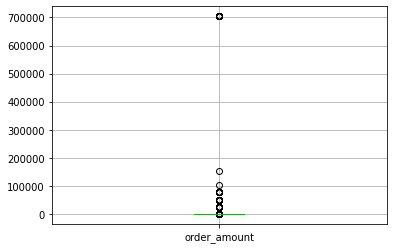

In [22]:
df.boxplot(column='order_amount')


We can plot the data using `distplot()` to check the skewness of our dataset. We can also use `.skew()` to check how much it is skewed. Usually, we would expect the skew to be between -1 and 1. In our dataset, it is 16,68! In another case, we could use numpy's `.log()` or another data tramsformation method to normalize or standardize the data but our case is not the case since skew is too high.

c:\Program Files (x86)\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


16.675033432503792


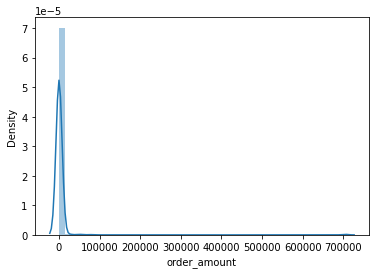

In [23]:
order_am = df['order_amount']
sns.distplot(order_am)
print(order_am.skew())

It would be right to sort the values in **order_amount** to get the details of the *highest* values in this column which skew our data.

We want to know:
- who made such orders; 
- when somebody made these orders; 
- how many items they ordered;
- which shop the amount was ordered from;
- payment method would be also interesting to check since if somebody paid 704,000 cash that would be at least suspicious.

In [24]:
sorted_df = df.sort_values(by='order_amount', ascending=False)
print(sorted_df.head(50))


      order_id  shop_id  user_id  order_amount  total_items payment_method  \
2153      2154       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
15          16       42      607        704000         2000    c

Aslo we can count how often these values appear by grouping them.

In [25]:
val_grouped = df.groupby(['shop_id','order_amount', 'total_items','user_id' ]).size().reset_index(name='count').sort_values(by = 'order_amount', ascending=False)
print(val_grouped.head(50))

      shop_id  order_amount  total_items  user_id  count
2051       42        704000         2000      607     17
3792       78        154350            6      878      1
3791       78        102900            4      834      1
3786       78         77175            3      818      1
3785       78         77175            3      817      1
3788       78         77175            3      928      1
3789       78         77175            3      962      1
3784       78         77175            3      787      1
3783       78         77175            3      775      1
3782       78         77175            3      766      1
3790       78         77175            3      969      1
3787       78         77175            3      915      1
3769       78         51450            2      760      1
3781       78         51450            2      983      1
3780       78         51450            2      967      1
3779       78         51450            2      960      1
3778       78         51450    

The code above let us understand that 2 shops - 78 and 42 need attention. 

1. Shop 78:
   - sells one item for the price of 25725;
   - the customers are diverse with differnte payment methods and purchase times.

2. Shop 42:
   - user 607 ordered 2000 items 17 times in one month
   - user 607 always paid with a credit card
   - user 607 made orders at 4 am regularly
   - if we group by time, we will see that there are 3 orders made is **less than 1 second by user 607**
   - ATTENTION: not all purchases are this big. There are aslo *normal* values in shop 42 in the column **order_amount**. 

The code below proves it ->

In [26]:
unique_shops = df.groupby(['shop_id','order_amount']).size().reset_index(name='count').sort_values(by = 'shop_id', ascending=False)
print(unique_shops.loc[unique_shops['shop_id'].isin([42])])

     shop_id  order_amount  count
188       42          1056      3
186       42           352     15
187       42           704     13
189       42          1408      2
190       42          1760      1
191       42        704000     17


### Conclusions at this step
- Seems as if shop 42 gets regular **fraud atacks** at 4:00 am exactly some days, since they order 2000 shoes (which is an unusual amount). It can also be confirmed by the information that the user makes 3 orders in less than 1 second. The shop requires security analisys, perhaps. High values are not a problem here as they will not be included in IQR and further analysis.
- Shop 78 sells a pair of shoes for 25725. Looking at this value and average price for shoes in our dataset, the reasonable price would be 257,25 if we included cents and saved values as floats. Maybe, an error occured when gathering the data or during the convertion process. Perhaps, we will transform these values 100 times less and round them, so that they will be included in further analysis.  

In [27]:
#convert the order_amount in shop 78
df['order_amount'][df['shop_id'] == 78] = round(df['order_amount'][df['shop_id'] == 78].div(100), 0)
pd.options.mode.chained_assignment = None
#check the results
print(df[df['shop_id'] == 78])


      order_id  shop_id  user_id  order_amount  total_items payment_method  \
160        161       78      990           257            1    credit_card   
490        491       78      936           514            2          debit   
493        494       78      983           514            2           cash   
511        512       78      967           514            2           cash   
617        618       78      760           514            2           cash   
691        692       78      878          1544            6          debit   
1056      1057       78      800           257            1          debit   
1193      1194       78      944           257            1          debit   
1204      1205       78      970           257            1    credit_card   
1259      1260       78      775           772            3    credit_card   
1384      1385       78      867           257            1           cash   
1419      1420       78      912           257            1     

Now we can calculate interquartile range (IQR) and plot it. It should show us the scope of the most reliable data.

<AxesSubplot:>

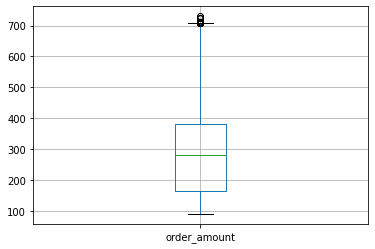

In [28]:
q1 = df.order_amount.quantile(q=0.25)
q3 = df.order_amount.quantile(q=0.75)
IQR = iqr(df.order_amount)

df_qtiled = df[(df.order_amount < q3 + IQR * 1.5) & (df.order_amount > q1 - IQR * 1.5)]
df_qtiled.boxplot(column='order_amount')

The following `.describe()` function shows now a better picture of our data. So now we can think of the relevant AOV reporting. 
1. We see that the mean is adequate - 294,3
2. Standard deviation is aslo believable - 144.5
3. Them **medium** of our data is 280. Which I would report as AOV, since the data is skewed and there are obvious outliers.

In [29]:
df_qtiled.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,2497.809358,50.053944,850.052922,294.293012,1.946669
std,1442.658530,29.042122,86.876913,144.502938,0.918404
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1245.250000,24.000000,776.000000,163.000000,1.000000
50%,2500.500000,50.000000,850.000000,280.000000,2.000000
75%,3748.750000,75.000000,925.000000,381.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


- We can also see that 106 values were excluded as they do not qualify for our IQR. 
- We can aslo check how many outliers we have in our range -> 56.

In [30]:
array_with_outl = np.where(df_qtiled['order_amount']>700)

print(len(array_with_outl[-1]))#the ids of outl in case one needs to analyze them (i.e. customer, shop etc.)
print(array_with_outl)



56
(array([  21,  401,  487,  554,  687,  798,  820,  863,  869,  961, 1104,
       1130, 1196, 1305, 1380, 1471, 1490, 1545, 1579, 1597, 1873, 1874,
       1876, 1964, 2227, 2264, 2416, 2440, 2498, 2499, 2554, 2603, 2708,
       2724, 2728, 2747, 2872, 2936, 2960, 3190, 3521, 3642, 3746, 4010,
       4088, 4210, 4241, 4267, 4335, 4425, 4564, 4651, 4670, 4702, 4757,
       4811], dtype=int32),)


Also good to consider if we want to improve our business:
- purchase frequency 
- margin value 
- average basket value (along with margin value)
- sales funnel 
